# Regression Analysis Assessment (Key)

## Objective
Predict house prices based on various features.

## 1. Data Loading and Preprocessing

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv(
    "../ml-assessments/datasets/house-prices-dataset.csv"
)

In [4]:
# Handle missing values (if any)
df = df.dropna()

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Categorical and numeric features
categorical_features = ["location"]
numeric_features = ["size_sqft", "bedrooms", "bathrooms", "age_years", "garage_spaces"]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# Separating target variable and feature variables
X = df.drop("price", axis=1)
y = df["price"]

# Apply the transformations
X_encoded = preprocessor.fit_transform(X)

# Get the feature names
feature_names = (
    numeric_features
    + preprocessor.named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

# Convert the transformed data back to a DataFrame with the correct column names
X_encoded = pd.DataFrame(X_encoded, columns=feature_names)

In [12]:
X_encoded

,size_sqft,bedrooms,bathrooms,age_years,garage_spaces,location_suburban,location_urban
0,1500.0,3.0,2.0,10.0,1.0,1.0,0.0
1,2200.0,4.0,3.0,5.0,2.0,0.0,1.0
2,1800.0,3.0,2.0,15.0,2.0,0.0,0.0
3,2500.0,5.0,3.0,2.0,2.0,1.0,0.0
4,1200.0,2.0,1.0,30.0,0.0,0.0,1.0
5,3000.0,4.0,4.0,8.0,3.0,1.0,0.0
6,1600.0,3.0,2.0,20.0,1.0,0.0,0.0
7,2800.0,5.0,3.0,3.0,2.0,0.0,1.0
8,1400.0,2.0,2.0,12.0,1.0,1.0,0.0
9,2000.0,4.0,2.0,6.0,2.0,0.0,0.0


## 2. Exploratory Data Analysis

        size_sqft   bedrooms  bathrooms  age_years  garage_spaces  \
count    15.00000  15.000000  15.000000  15.000000      15.000000   
mean   2080.00000   3.666667   2.466667  11.066667       1.666667   
std     644.98062   1.234427   0.915475   8.803138       0.816497   
min    1200.00000   2.000000   1.000000   1.000000       0.000000   
25%    1550.00000   3.000000   2.000000   4.500000       1.000000   
50%    2000.00000   4.000000   2.000000   8.000000       2.000000   
75%    2550.00000   4.500000   3.000000  16.500000       2.000000   
max    3200.00000   6.000000   4.000000  30.000000       3.000000   

               price  
count      15.000000  
mean   398666.666667  
std    195625.979383  
min    180000.000000  
25%    245000.000000  
50%    320000.000000  
75%    565000.000000  
max    780000.000000  


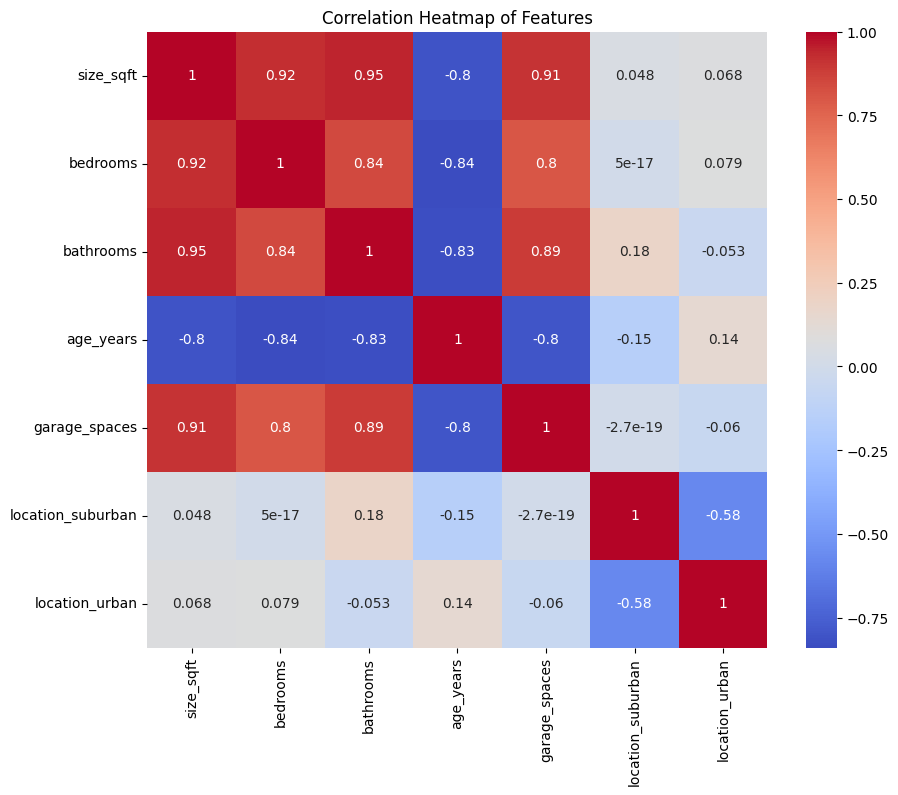

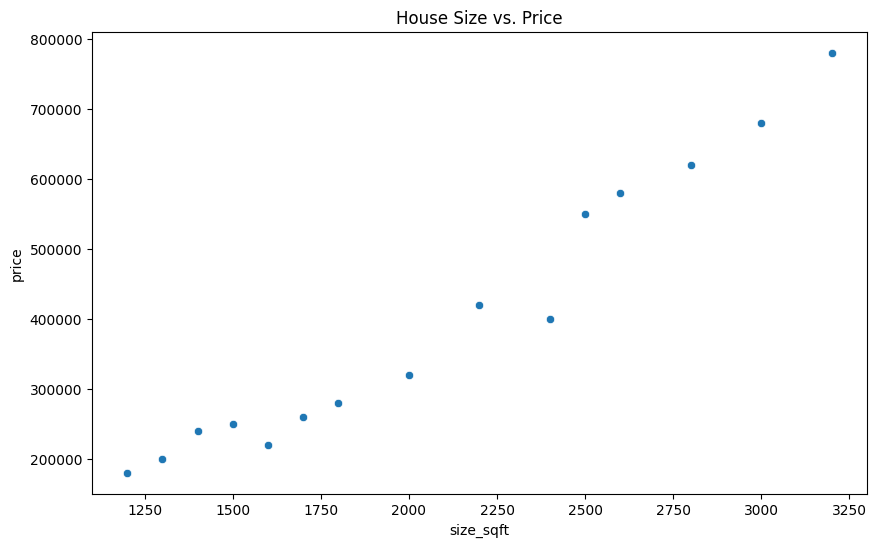

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display summary statistics of the numerical features
print(df[numeric_features + ["price"]].describe())

# Create a correlation heatmap of the features
plt.figure(figsize=(10, 8))
sns.heatmap(X_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# Plot a scatter plot of house size vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="size_sqft", y="price")
plt.title("House Size vs. Price")
plt.show()

## 3. Feature Selection

In [14]:
# Identify the top 5 features with strongest correlation to house price
correlations = X_encoded.corrwith(y).abs().sort_values(ascending=False)
top_5_features = correlations.head(5)
print("Top 5 features correlated with price:")
print(top_5_features)

# Explanation
"""
I chose these top 5 features because they have the strongest correlation with the house price.
This indicates that they are likely to be the most influential in determining the price.
However, it's important to note that correlation doesn't imply causation, and we should be
cautious about multicollinearity among these features.
"""

Top 5 features correlated with price:
size_sqft        0.976875
bathrooms        0.925043
bedrooms         0.903138
garage_spaces    0.860093
age_years        0.757316
dtype: float64


"\nI chose these top 5 features because they have the strongest correlation with the house price.\nThis indicates that they are likely to be the most influential in determining the price.\nHowever, it's important to note that correlation doesn't imply causation, and we should be\ncautious about multicollinearity among these features.\n"

## 4. Model Selection and Training

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Choose and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explanation
"""
I chose Random Forest Regressor because:
1. It can capture non-linear relationships between features and the target variable.
2. It's less prone to overfitting compared to a single decision tree.
3. It can handle both numerical and categorical features well.
4. It provides feature importance, which can give insights into which features are most predictive.
5. It often performs well out-of-the-box without extensive hyperparameter tuning.
"""

"\nI chose Random Forest Regressor because:\n1. It can capture non-linear relationships between features and the target variable.\n2. It's less prone to overfitting compared to a single decision tree.\n3. It can handle both numerical and categorical features well.\n4. It provides feature importance, which can give insights into which features are most predictive.\n5. It often performs well out-of-the-box without extensive hyperparameter tuning.\n"

## 5. Making Predictions

Mean Squared Error: 1406150000.00
R-squared Score: -0.47


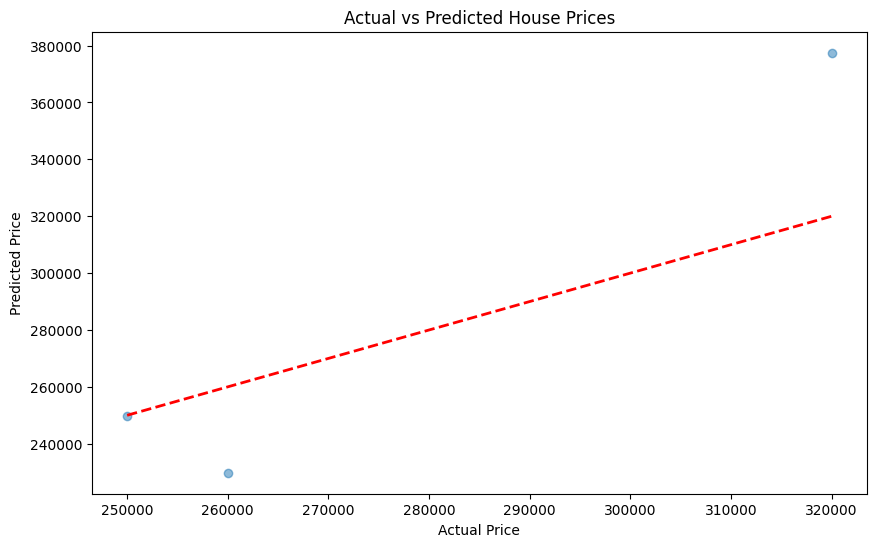

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display the Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot the predicted prices against the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()